# Import packages for plotting and analyzing data

In [1]:
import matplotlib.pyplot as plt
import mplstereonet
import pandas as pd
import numpy as np

# Plot a plane and a line

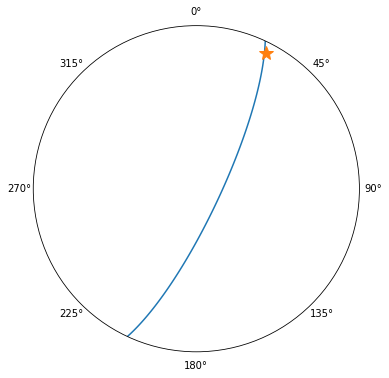

In [2]:
fault_strike, fault_dip = 25, 78
slick_trend, slick_plunge = 27, 7

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

# Plot the two planes...
ax.plane(fault_strike, fault_dip)

# Plot the plunge/trend
ax.line(slick_plunge, slick_trend, marker='*', markersize=15)

plt.show()

# Plot two planes

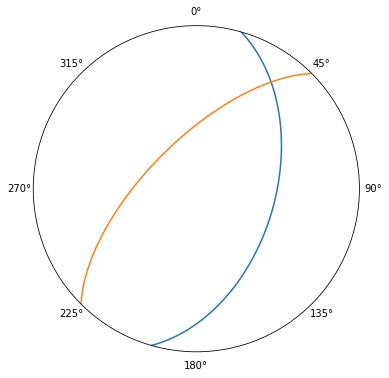

In [3]:
strike1 = 16
dip1 = 50

strike2 = 225
dip2 = 66

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

# Plot the two planes...
ax.plane(strike1, dip1)
ax.plane(strike2, dip2)

plt.show()

# Determine the intersection between the planes and plot it too

In [4]:
# Find the intersection of the two as a plunge/bearing
plunge, trend = mplstereonet.plane_intersection(strike1, dip1, strike2, dip2)

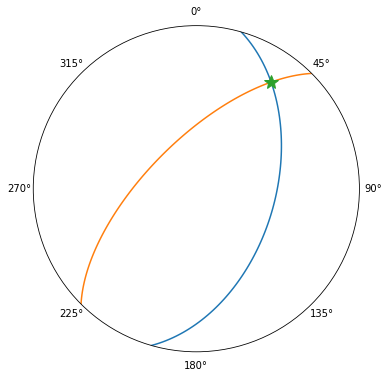

In [5]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

# Plot the two planes...
ax.plane(strike1, dip1)
ax.plane(strike2, dip2)

# Plot the plunge/trend
ax.line(plunge, trend, marker='*', markersize=15)

plt.savefig('example_figure.pdf')
plt.show()

# Display the intersections between the planes

In [6]:
print("The trend of the fold axis is:")
print(trend)
print("The plunge of the fold axis is:")
print(plunge)

The trend of the fold axis is:
[35.0347195]
The plunge of the fold axis is:
[21.24009705]


# Plot a plane and its pole

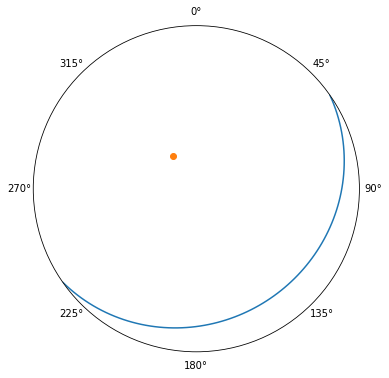

In [7]:
strike3 = 55
dip3 = 20

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

ax.plane(strike3, dip3)
ax.pole(strike3, dip3)

plt.show()

# Plot a lot of planes and determine the fold axis

We can use pandas to import lots of planes

In [8]:
fake_planes_data = pd.read_csv('fake_planes.csv')
fake_planes_data

,strike,dip
0,301.612782,83.526003
1,306.092876,75.216800
2,300.649056,88.755718
3,300.539252,71.767969
4,296.297720,67.301052
5,311.796986,52.273319
6,297.197393,62.793971
7,265.787145,38.540912
8,295.306304,34.171437
9,248.503368,22.206321


In [9]:
fake_planes_strike = fake_planes_data['strike']
fake_planes_dip = fake_planes_data['dip']

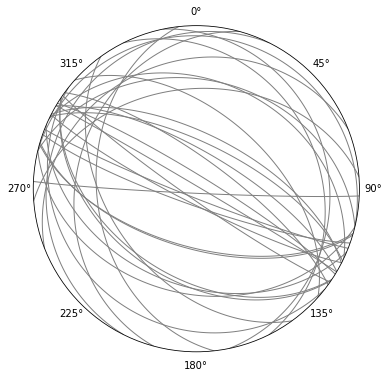

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

ax.plane(fake_planes_strike, fake_planes_dip, color='grey', linewidth=1)

plt.show()

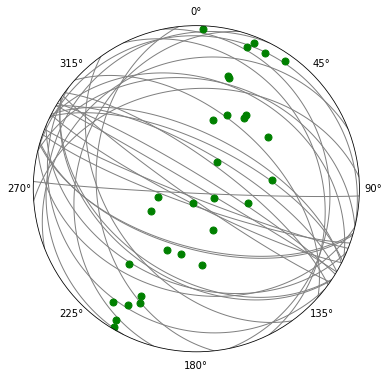

In [11]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

ax.plane(fake_planes_strike, fake_planes_dip, color='grey', linewidth=1)
ax.pole(fake_planes_strike, fake_planes_dip, marker='.', color='green', markersize=14)

plt.show()

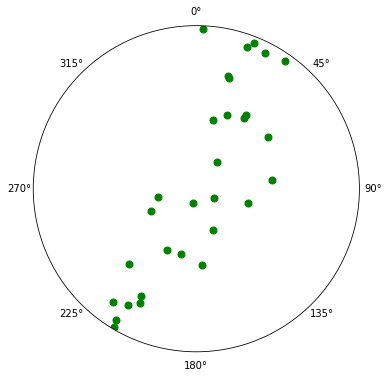

In [12]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(fake_planes_strike, fake_planes_dip, marker='.', color='green', markersize=14)

plt.show()

# We can fit a plane to the poles

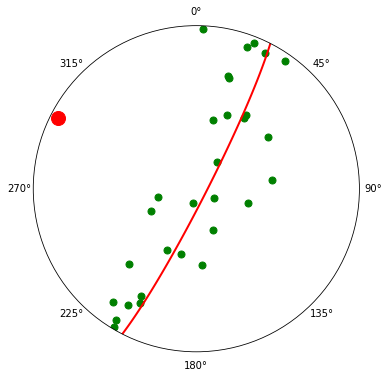

In [13]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(fake_planes_strike, fake_planes_dip, marker='.', color='green', markersize=14)

fit_strike, fit_dip = mplstereonet.fit_girdle(fake_planes_strike, fake_planes_dip)
ax.plane(fit_strike, fit_dip, color='red', lw=2)
ax.pole(fit_strike, fit_dip, marker='o', color='red', markersize=14)

plt.show()

# Import your own planes

In [14]:
my_planes = pd.read_csv('plane.csv')
my_planes.columns

Index(['localityId', ' localityName', ' dataId', ' x', ' y', ' latitude',
       ' longitude', ' zone', ' altitude', ' horiz_precision',
       ' vert_precision', ' planeType', ' dip', ' dipAzimuth', ' strike',
       ' declination', ' rockUnit', ' timedate', ' notes'],
      dtype='object')

In [15]:
my_strikes = my_planes[' strike']
my_dips = my_planes[' dip']

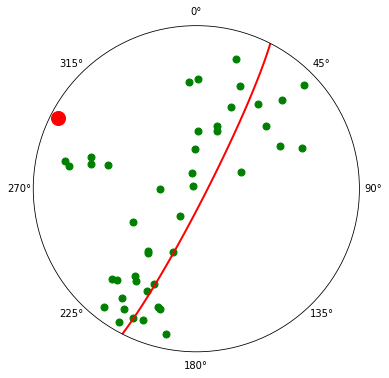

In [16]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(my_strikes, my_dips, marker='.', color='green', markersize=14)

fit_strike, fit_dip = mplstereonet.fit_girdle(fake_planes_strike, fake_planes_dip)
ax.plane(fit_strike, fit_dip, color='red', lw=2)
ax.pole(fit_strike, fit_dip, marker='o', color='red', markersize=14)

plt.show()

# And if you want to get fancy

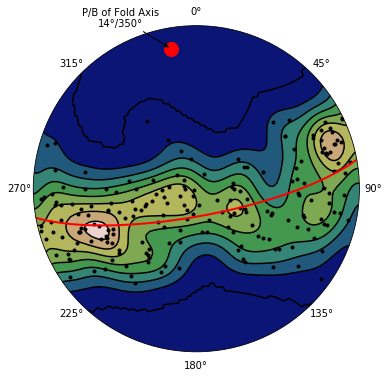

In [17]:
# Generate a random girdle distribution from the plunge/bearing of a fold hinge
# In the end, we'll have strikes and dips as measured from bedding in the fold.
# *strike* and *dip* below would normally be your input.
num_points = 200
real_bearing, real_plunge = 350, 15
s, d = mplstereonet.plunge_bearing2pole(real_plunge, real_bearing)
lon, lat = mplstereonet.plane(s, d, segments=num_points)
lon += np.random.normal(0, np.radians(15), lon.shape)
lat += np.random.normal(0, np.radians(15), lat.shape)
strike, dip = mplstereonet.geographic2pole(lon, lat)

# Plot the raw data and contour it:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')
ax.density_contourf(strike, dip, cmap='gist_earth')
ax.density_contour(strike, dip, colors='black')
ax.pole(strike, dip, marker='.', color='black')

# Fit a plane to the girdle of the distribution and display it.
fit_strike, fit_dip = mplstereonet.fit_girdle(strike, dip)
ax.plane(fit_strike, fit_dip, color='red', lw=2)
ax.pole(fit_strike, fit_dip, marker='o', color='red', markersize=14)

# Add some annotation of the result
lon, lat = mplstereonet.pole(fit_strike, fit_dip)
(plunge,), (bearing,) = mplstereonet.pole2plunge_bearing(fit_strike, fit_dip)
template = u'P/B of Fold Axis\n{:02.0f}\u00b0/{:03.0f}\u00b0'
ax.annotate(template.format(plunge, bearing), ha='center', va='bottom',
            xy=(lon, lat), xytext=(-50, 20), textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', facecolor='black'))

plt.show()

In [18]:
strike.tolist()

[[169.70934901759546],
 [170.14403025683214],
 [152.7087647383881],
 [346.4715011656679],
 [333.29973084072265],
 [356.1429483257249],
 [339.7750792297668],
 [157.2153542730813],
 [331.06711161934004],
 [189.5792471898166],
 [346.9532994693785],
 [154.19611276669264],
 [331.0154879338537],
 [334.63066987786283],
 [345.5058291156942],
 [333.18560046261484],
 [347.1140544228845],
 [333.4549329202044],
 [350.21599063208777],
 [312.32134437916704],
 [352.97734840079005],
 [320.3557119794486],
 [17.849777365318346],
 [339.6452685895928],
 [318.6324864384377],
 [339.7847272700782],
 [321.40663936446583],
 [334.2312884854673],
 [348.06602235751154],
 [340.2171280085065],
 [339.1503728483566],
 [353.22938873713485],
 [354.80587751336674],
 [8.435809865361819],
 [325.02337553584823],
 [346.3875856413379],
 [339.96333904237235],
 [326.9584088932545],
 [336.4770186497833],
 [343.1763937784657],
 [350.9575128810184],
 [303.1789730594037],
 [330.69131436232067],
 [357.43253890169314],
 [329.2830449